# **Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Repository/data_train_dqlab.csv')

In [4]:
data.head(5)

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0


In [5]:
data = pd.DataFrame(data)
data = data.rename(columns = {'awards_won?':'awards_won'})

In [6]:
data.head(5)

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0


Cleaning Data

In [7]:
#identify missing value
null_education = data.education.isnull().sum()
null_previous_year_rating = data.previous_year_rating.isnull().sum()
print(null_education)
print(null_previous_year_rating)

3443
5936


In [8]:
#replacing missing value
data['education'].fillna(value="others",inplace=True)
data['previous_year_rating'].fillna(value=0.0,inplace=True)

In [9]:
#All departments in data
departments = data.department.value_counts()
print(departments)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64


In [10]:
#all regions in data 
regions = data.region.value_counts()
print(regions)
len(regions)

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64


34

In [11]:
#Number of employee that is recommended for promotion
num_promoted = len(data.is_promoted[data.is_promoted==1])
print(num_promoted)
num_Notpromoted=len(data.is_promoted[data.is_promoted==0])
print(num_Notpromoted)

1226
77072


In [12]:
import matplotlib.pyplot as plt
import numpy as np

23206
55092


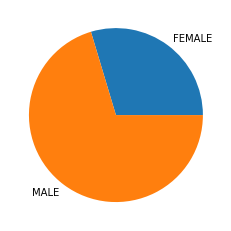

In [14]:
#identify ratio gender in data
female = len(data.gender[data.gender=='f'])
male = len(data.gender[data.gender=='m'])
print(female)
print(male)
y = np.array([female,male])
label=["FEMALE","MALE"]
plt.pie(y, labels = label)
plt.show()

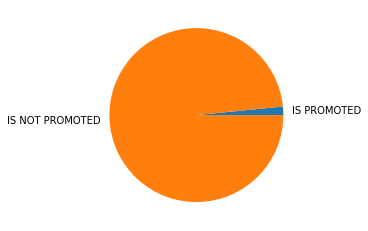

In [15]:
#Chart for is_promoted vs not promoted
y = np.array([num_promoted,num_Notpromoted])
label=["IS PROMOTED","IS NOT PROMOTED"]
plt.pie(y, labels = label)
plt.show()

From the chart we can get that the class is imbalance. Number of 'is not promoted' is much more than 'is promoted'. 
The number of employee who will be recommended for promotion is very least. 

In [16]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,satisfaction_score,engagement_score,is_promoted
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,39149.500000,1.253378,34.797619,3.079593,5.848974,0.023053,63.349664,2.997088,1.497678,0.015658
std,22602.830026,0.606766,7.665928,1.499173,4.248070,0.150073,13.383664,1.417143,1.190530,0.124150
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,39.000000,1.000000,0.000000,0.000000
25%,19575.250000,1.000000,29.000000,2.000000,3.000000,0.000000,51.000000,2.000000,0.540000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,3.000000,1.170000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,4.000000,2.230000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,5.000000,5.000000,1.000000


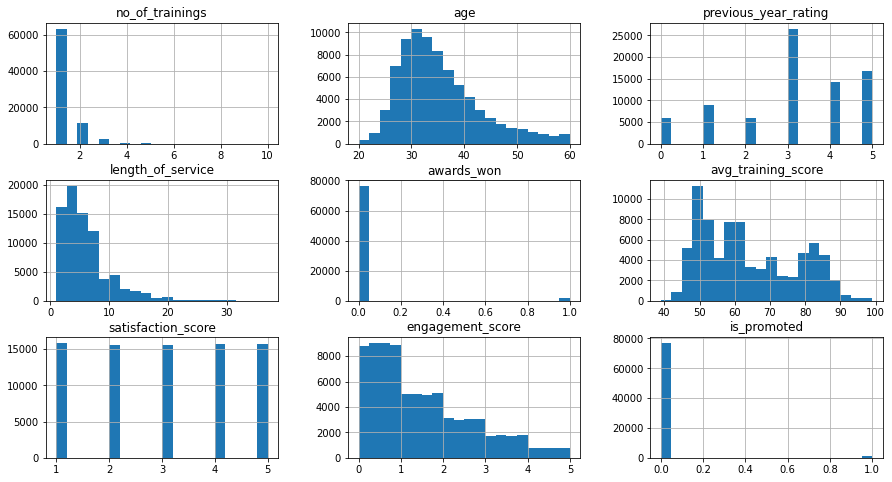

In [17]:
data.drop(columns='employee_id',inplace=True) 
data.hist(bins=20, figsize=(15,8))
plt.show()

In [18]:
#split data of the employee that is recommender for promotion
promoted = data[data.is_promoted==1]
promoted.head()

,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,satisfaction_score,engagement_score,is_promoted
335,Procurement,region_12,Bachelor's,f,middle,other,1,32,5.0,5,1,84,4,4.43,1
628,Procurement,region_34,Bachelor's,m,middle,other,1,29,5.0,4,0,84,3,4.10,1
735,Finance,region_28,Master's & above,m,middle,other,1,33,3.0,3,1,60,5,4.52,1
826,Analytics,region_22,Bachelor's,m,middle,other,1,34,3.0,3,0,89,4,3.17,1
834,Procurement,region_20,Bachelor's,f,middle,other,1,33,2.0,3,0,69,4,3.95,1


Lets see the ration each department who is promoted 

TypeError: ignored

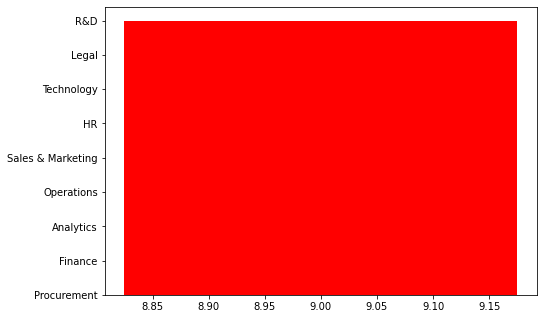

In [21]:
def Create_Chart(name_coloum):
  

ind = len(data.department.unique())
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, data.department[data.is_promoted==1], width, color='r')
ax.bar(ind, data.department[data.is_promoted==0], width,bottom=data.department[data.is_promoted==1], color='b')
ax.set_ylabel('Department')
ax.set_title('Promoted in Departments')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Promoted', 'Not Promoted'])
plt.show()

In [30]:
def create_crosstab(name_column):
  return pd.crosstab(name_column,data.is_promoted,normalize='index')

In [31]:
create_crosstab(data.job_level)

is_promoted,0,1
job_level,,
junior,0.985939,0.014061
middle,0.983818,0.016182
senior,0.984589,0.015411


From the table we can get that the promotion for each job_level is simillar

In [32]:
create_crosstab(data.gender)

is_promoted,0,1
gender,,
f,0.984314,0.015686
m,0.984353,0.015647


In [33]:
create_crosstab(data.awards_won)

is_promoted,0,1
awards_won,,
0,0.984927,0.015073
1,0.959557,0.040443


Also in gender, the promotion ratio for both female and male is simillar

In [ ]:
#Chart for number won award yes vs no in universal
num_winaward = len(data.awards_won[data.awards_won==1])
print(num_winaward)
num_notwinaward = len(data.awards_won[data.awards_won==0])
print(num_notwinaward)


1805
76493


In [ ]:
num_awardwon_ispromoted = len(promoted.awards_won[promoted.awards_won==1])
print(num_awardwon_ispromoted)

73


In [ ]:
#Korealasi won award with 